房价影响因素挖掘
原始数据：
house_rent
house_sell
qgis数据
要求
1、数据清洗、整合
2、计算“房屋售租比”，并做初步判断
3、上海市人口密度、路网密度、餐饮价格和“房屋每平米均价”是否有关系呢？
4、按照离市中心距离每10km，分别再次判断人口密度、路网密度和“房屋每平米均价”的相关程度

1、数据清洗要求：
①将“house_rent”、“house_sell”分别读取
②分别计算平方米建筑面积的月租金、每平方米建筑面积的房价
③将数据按照小区名合并

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv(r'C:\Users\a5558\Desktop\练习\房价影响因素挖掘\house_rent.csv',engine = 'python') 
df2 = pd.read_csv(r'C:\Users\a5558\Desktop\练习\房价影响因素挖掘\house_sell.csv',engine = 'python')

In [2]:
df1.head(5)

,title,community,address,city,district,price,area,lng,lat
0,曹江公寓，钥匙房，真实在租，精致户型,曹江公寓,临夏路98弄,上海,嘉定,3400,79.0,121.343132,31.264662
1,中星海兰苑，两室户，高清照片，如您所见,中星海兰苑,华江支路677弄,上海,嘉定,4000,80.0,121.344133,31.271693
2,嘉旺苑，南北通透，好房待租，空气清新,嘉旺苑,靖远路1288弄,上海,嘉定,4900,95.0,121.332318,31.262940
3,汇丰沁苑，小户型，高区景观房，一链倾城,汇丰沁苑,临夏路800弄;临夏路801弄,上海,嘉定,3100,53.0,121.335524,31.261589
4,富友嘉园，光线充足，精致户型，一链倾城,富友嘉园,临夏路999弄，临夏路1000弄,上海,嘉定,3000,72.0,121.328678,31.266058


In [3]:
df2.head(5)

,title,property_name,address,city,district,total_price,area,average_price,lat,lng
0,鑫苑国际城市花园，真实在售，视野很好，上门实勘,鑫苑国际城市花园,绿地大道189号,上海,上海周边,160.0,88.00,18181.0,31.286296,121.143489
1,南北直通，高区景观房，拎包入住，房本满五年,花苑新村（昆山）上海周边昆山,花桥镇花苑新村,上海,上海周边,210.0,169.83,12365.0,31.308387,121.082040
2,正规成熟小区，一链倾城，装修精致，3室2厅,绿地卡米小城,外青松公路988号,上海,上海周边,180.0,87.75,20512.0,31.311252,121.148217
3,厨卫全明，客厅朝南，低区出入方便，装修精美,绿地卡米小城上海周边昆山,外青松公路988号,上海,上海周边,180.0,90.00,20000.0,31.311252,121.148217
4,绿地启航社，好楼层，温馨一室，如您所见,绿地启航社,绿地大道199弄,上海,上海周边,118.0,54.65,21591.0,NaN,NaN


In [4]:
df1.dropna(inplace = True) #默认为False，True是指直接在原有数据上进行修改
df2.dropna(inplace = True)
df1["square_rent"] =df1["price"]/df1["area"] 

data_rent = df1[["community","square_rent","lng","lat"]].groupby(df1["community"]).mean()
data_sell = df2[["property_name","average_price","lng","lat"]].groupby(df2["property_name"]).mean()
data_rent.reset_index(inplace=True)  #不重新建立索引会报错
data_sell.reset_index(inplace=True)
data = pd.merge(data_rent,data_sell,left_on="community",right_on="property_name") #默认取交集
data = data[["community","square_rent","average_price","lng_x","lat_x"]]  #合并后相同列会在后缀中加x和y
data.rename(columns={"lng_x":"lng","lat_x":"lat"},inplace="True")
data.head(5)

,community,square_rent,average_price,lng,lat
0,VIP大厦,91.950017,75933.000000,121.532216,31.246939
1,一品名人居,110.929607,82699.000000,121.453460,31.241146
2,一品新筑苑,74.719974,73413.818182,121.477821,31.308435
3,一品漫城(一期)(公寓),119.869790,59565.137931,121.501431,31.123422
4,一品漫城(一期)(别墅),70.518859,62391.666667,121.500957,31.122432


2、计算“房屋售租比”，并做初步判断
要求：
①计算指标
②绘制直方图、箱型图看“售租比”的一个数据分布情况

Text(0.5, 1.0, '直方图')

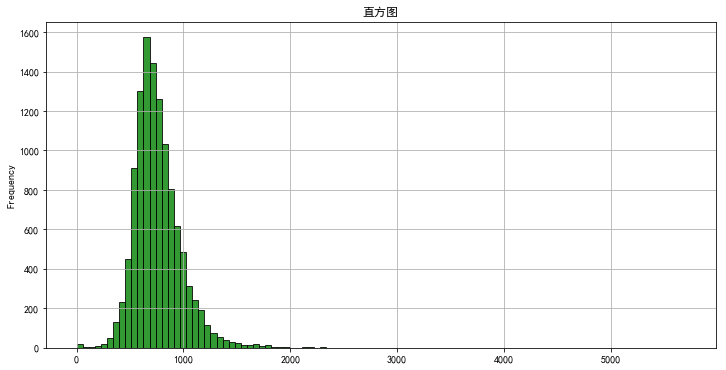

In [5]:
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文乱码问题
plt.rcParams['axes.unicode_minus']=False

data["sell_rent"] = data["average_price"]/data["square_rent"]
#n,bins,patches = plt.hist(data["sell_rent"], bins=100, facecolor="g", edgecolor="black", alpha = 0.8,)  
data["sell_rent"].plot.hist(bins=100, facecolor="g", edgecolor="black",grid=True,figsize=(12,6), alpha=0.8) 
plt.title("直方图")

Text(0.5, 1.0, '箱线图')

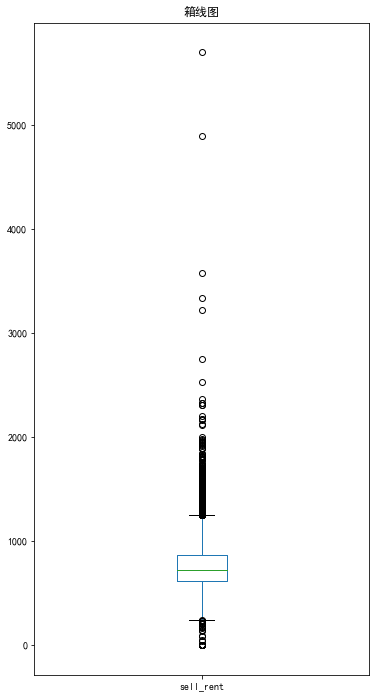

In [6]:
#plt.boxplot(data["sell_rent"])
data["sell_rent"].plot.box(figsize = (6,12))
plt.title("箱线图")

3、上海市人口密度、路网密度、餐饮价格和“房屋每平米均价”是否有关系呢？
要求：
① 首先，导出整理好的数据，并qgis中绘制空间格网图，查看房屋每平米均价、房屋每平米租金及售租比数据的空间分布
② 第二，空间统计，分别按照格网对人口密度、路网密度、餐饮价格进行指标统计并标准化
③ 第三，加载上海中心点point空间数据，计算每个网格到市中心距离
④ 第四，将空间格网的“房屋每平米均价”按照距市中心的距离排序，并制作散点图，看看能否挖掘出什么信息

In [7]:
data.to_csv(r'C:\Users\a5558\Desktop\练习\房价影响因素挖掘\'pro10data.csv')
print("finished")

finished


3、上海市人口密度、路网密度、餐饮价格和“房屋每平米均价”是否有关系呢？
要求：
① 首先，导出整理好的数据，并qgis中绘制空间格网图，查看房屋每平米均价、房屋每平米租金及售租比数据的空间分布
② 第二，空间统计，分别按照格网对人口密度、路网密度进行指标统计并标准化
③ 第三，加载上海中心点point空间数据，计算每个网格到市中心距离
④ 第四，将空间格网的“房屋每平米均价”按照距市中心的距离排序，并制作散点图，看看能否挖掘出什么信息
这里市中心点坐标为：lng-353508.848122，lat-3456140.926976 (投影坐标系)

In [8]:
data_1 = pd.read_csv(r'C:\Users\a5558\Desktop\练习\房价影响因素挖掘\result.csv')  #通过qgis得到数据
data_1.fillna(0, inplace = True)
data_1.head(10)

,Z,长度,data_count,average_pr,square_ren,sell_rent,lng,lat
0,0,0.000000,0.0,0.0,0.0,0.0,334590,3396011
1,0,128.477758,0.0,0.0,0.0,0.0,333590,3397011
2,0,1539.908057,0.0,0.0,0.0,0.0,334590,3397011
3,0,1032.299541,0.0,0.0,0.0,0.0,335590,3397011
4,0,1543.891782,0.0,0.0,0.0,0.0,336590,3397011
5,0,172.251963,0.0,0.0,0.0,0.0,337590,3397011
6,0,2038.437108,0.0,0.0,0.0,0.0,338590,3397011
7,0,2011.393625,0.0,0.0,0.0,0.0,339590,3397011
8,0,123.736459,0.0,0.0,0.0,0.0,340590,3397011
9,0,1001.947338,0.0,0.0,0.0,0.0,333590,3398011


In [9]:
#指标标准化处理
def f1(data,col):
    return (data[col]-data[col].min())/(data[col].max()-data[col].min())
data_1["人口密度"] = f1(data_1,"Z")
data_1["路网密度"] = f1(data_1,"长度")
data_1["距离市中心距离"] = ((data_1["lng"]-353508.848122)**2 + (data_1["lat"]-3456140.926976)**2)**0.5
data_1["房屋均价"] = data_1["average_pr"]
data_new = data_1[["人口密度","路网密度","距离市中心距离","房屋均价"]]
data_new = data_new[data_new["房屋均价"]>0].reset_index() #去掉均价的0的数据，索引不会自动更新
del data_new["index"]
data_new.head(10)

,人口密度,路网密度,距离市中心距离,房屋均价
0,0.000000,0.354069,58359.981981,19501.00000
1,0.000000,0.064443,58163.990583,13830.00000
2,0.000000,0.375962,57381.422454,18119.00000
3,0.000000,0.109135,57182.077145,19153.66667
4,0.000000,0.002015,56999.581142,26648.00000
5,0.266286,0.169536,56859.855623,14174.00000
6,0.149961,0.328984,56403.615034,27544.50000
7,0.000000,0.421804,56200.801531,25410.00000
8,0.000000,0.129160,56015.108644,22124.00000
9,0.260570,0.115057,55890.816128,23630.40000


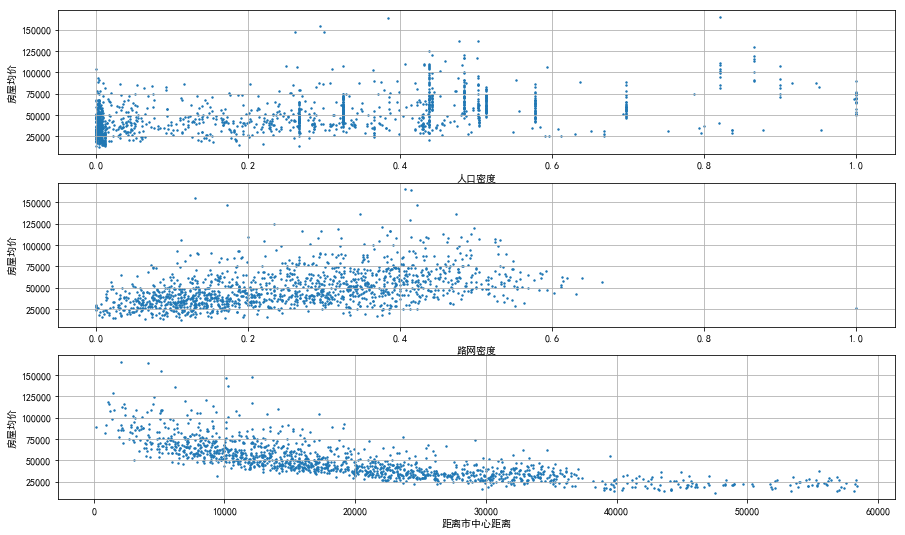

In [10]:
plt.figure(figsize=(15,9))
plt.subplot(3,1,1)
plt.scatter(data_new["人口密度"],data_new["房屋均价"],s=2)
plt.xlabel("人口密度")
plt.ylabel("房屋均价")
plt.grid()
plt.subplot(3,1,2)
plt.scatter(data_new["路网密度"],data_new["房屋均价"],s=2)
plt.xlabel("路网密度")
plt.ylabel("房屋均价")
plt.grid()
plt.subplot(3,1,3)
plt.scatter(data_new["距离市中心距离"],data_new["房屋均价"],s=2)
plt.xlabel("距离市中心距离")
plt.ylabel("房屋均价")
plt.grid()

结论：距离市中心距离和房价的相关程度最高，人口密度和路网密度对房价也有较大的影响

4、按照离市中心距离每10km，分别再次判断人口密度、路网密度、餐饮价格和“房屋每平米均价”的相关程度
要求：
① 按照空间距离分别迭代计算指标和“房屋每平米均价”的关系
② 绘制折线图查看：随着市中心距离增加，不同指标相关系系数变化情况

In [11]:
dis = []  #距离列表,为画图做准备
rkmd_corr = []  #人口密度相关系数列表
lwmd_corr = []  #路网密度相关系数列表
jl_corr = []    #距离相关系数列表
for distance in range(10000,70000,10000):      
    data_new1 = data_new[data_new["距离市中心距离"] <= distance]
    cor = data_new1.corr().loc["房屋均价"]   #相关系数计算
    dis.append(distance)
    rkmd_corr.append(cor.loc["人口密度"])
    lwmd_corr.append(cor.loc["路网密度"])
    jl_corr.append(cor.loc["距离市中心距离"])
    print(cor)

人口密度       0.069674
路网密度      -0.091147
距离市中心距离   -0.493409
房屋均价       1.000000
Name: 房屋均价, dtype: float64
人口密度       0.370515
路网密度       0.195327
距离市中心距离   -0.595894
房屋均价       1.000000
Name: 房屋均价, dtype: float64
人口密度       0.494079
路网密度       0.377879
距离市中心距离   -0.713063
房屋均价       1.000000
Name: 房屋均价, dtype: float64
人口密度       0.462663
路网密度       0.412154
距离市中心距离   -0.731038
房屋均价       1.000000
Name: 房屋均价, dtype: float64
人口密度       0.490142
路网密度       0.441356
距离市中心距离   -0.743073
房屋均价       1.000000
Name: 房屋均价, dtype: float64
人口密度       0.502724
路网密度       0.449742
距离市中心距离   -0.735211
房屋均价       1.000000
Name: 房屋均价, dtype: float64


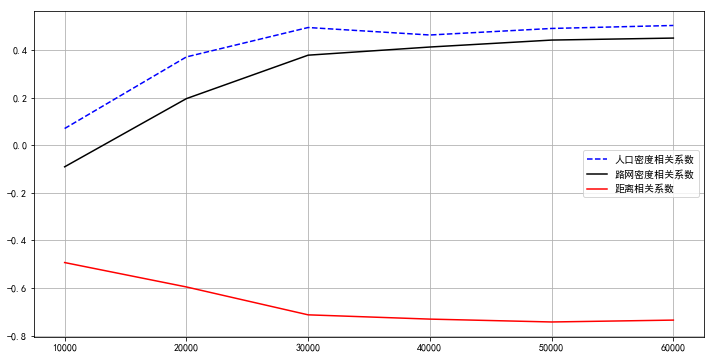

In [12]:
plt.figure(figsize=(12,6))
x = dis
y1 = rkmd_corr
y2 = lwmd_corr
y3 = jl_corr
plt.plot(x, y1, color="b", linestyle='--',label="人口密度相关系数")
plt.plot(x, y2, color="k", label="路网密度相关系数")
plt.plot(x, y3, color="r", label="距离相关系数")
plt.grid()
plt.legend(("人口密度相关系数", "路网密度相关系数", "距离相关系数"), loc='right') 

结论：“人口密度”、“路网密度”、“离市中心距离”和“房屋均价”有着明显的相关性，且随着距离的增加，相关性变得更强，距离的分界线大概在20-30km处，这正是上海中心城区和郊区的分界